# **Analyzing Employee attrition in Company X.**

## **Introduction.** 

### **Undestanding Attrition.** 

One defination of **attrition** by [merriam-webster.com](https://www.merriam-webster.com/dictionary/attrition) describes it as; ***a reduction in the number of employees or participants that occurs when people leave because they resign, retire, etc., and are not replaced.*** This definition precisely describes what our project is all about. By general knowledge we know that there might be quite a number of reasons an employee might choose to leave a company. 

The project seeks to explore data about factors that affect employee attrition and how the relate to one another. To mention just but a few of the factors represented by the datapoints include; employee satisfaction level, last evalution, project number,promotion in the last five year, department, salary, total work hours per month, etc.

Inorder to understand and give meaning insights from our data we apply the use of data science techniques like data cleaning, exploratory data analysis(EDA), machine learning and a litle bit of machine learning for prediction. To achieve this we make use of various data science tools like `numpy`, `pandas`,'`dash`, `matplotlib`, `seaborn`, `scikit learn` and others. 

Each and every tool mentioned above has specific application in the project. i.e,
 - `Numpy` - useful in numerical data manipulation, [more info.](https://numpy.org/).
 - `Pandas` - For exploring data in for of data frames [more info.](https://pandas.pydata.org/)
 - `Matplotlib` and `Seaborn` - for making data visualizations, [more info on matplolib](https://matplotlib.org/), [info on seaborn](https://seaborn.pydata.org/).
 - `Dash` - Useful in making dashboards [more info](https://plotly.com/dash/).
 
# **Task 0**

The first step in out project in to load and import the `python` packages we might need. If the packages are not alread installed, we might need to install them using the [python packaging manager(pip)](https://pypi.org/project/pip/). `Pip` is an official tool specific to `python` language for installing, updating and uninstalling python packages. 






In [1]:
%%capture
# install packages if not present
!pip install seaborn

In [2]:
#import required packages
import pandas  as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


# **Task 1** 

 In this step we load our dataset. The tool most suited for this kind of task is `python`'s `pandas`. 
 Our data is in an excel worksheet so we load and read it using `panda`'s `.read_excel()` method. 
 
 For our project we have two datasets. First is data for employees who are yet to leave the company and the second are those who have left. These two datasets are read and stored in variables `data1` and `data2` respectively. 
 
 After reading the data we create a new colum to show if attrition has happened or not. Value `1` in the attrition column shows they have while `0` shows they have not. 
 
 Now the two datasets are ready so we can merge them together using the pandas `concat` method.The new dataframe is stored in a variable known as `full_data`.
 
 We can now take a look at the first few records using the `head()` method and the last records using `.tail()` method.
 We are now ready for some data cleaning.

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#load data 
#Existing employee data in sheet1 into data1
data1 = pd.read_excel('data/Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx',sheet_name=1)
#employees who left into data2 
data2 = pd.read_excel('data/Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx',sheet_name=2)

#introduce column 'Attrition' to indicate attrition if the  employees left or stayed
data1.insert(1, 'Attrition', 0)

data2.insert(1, 'Attrition', 1)


In [5]:
#combine the two dataframes 
full_data = pd.concat([data1,data2])
#the a look at the first few records of the data
full_data.head(5)


,Emp ID,Attrition,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0,0.49,0.60,3,214,2,0,0,sales,low


In [6]:
#peak at the last few records of data
full_data.tail(5)

,Emp ID,Attrition,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
3566,14995,1,0.40,0.57,2,151,3,0,0,support,low
3567,14996,1,0.37,0.48,2,160,3,0,0,support,low
3568,14997,1,0.37,0.53,2,143,3,0,0,support,low
3569,14998,1,0.11,0.96,6,280,4,0,0,support,low
3570,14999,1,0.37,0.52,2,158,3,0,0,support,low


# **Task 2** 
# Data cleaning 
The first step to clean data is to check for some null values. We us `.isnull().any()` to check and note an value that might be missing in all our columns. In the case of our data we have none that is missing. So our data i okay for now.

In [7]:
#check for missing values 
full_data.isnull().any()

Emp ID                   False
Attrition                False
satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
promotion_last_5years    False
dept                     False
salary                   False
dtype: bool

In [8]:
#check the number who left and those who did not
full_data["Attrition"].value_counts()

0    11428
1     3571
Name: Attrition, dtype: int64

# **Task 3** 
# Data Visualization. 

Inorder to gain meaningful information about our data we need to explore it further. By this we can make some statistical visualizations using the data to compare various aspects of the data using statistics. 

Some visualization you can make out of data include some but not limited to Column Chart
  
   - Bar Graph                 
   - Pie Chart
   - Stacked Bar Graph          
   - Waterfall Chart
   - Stacked Column Chart      
   - Bubble Chart
   - Area Chart                
   - Scatter Plot Chart
   - Dual Axis Chart           
   - Bullet Graph
   - Line Graph                 
   - Funnel Chart
   - Mekko Chart                
   - Heat Map


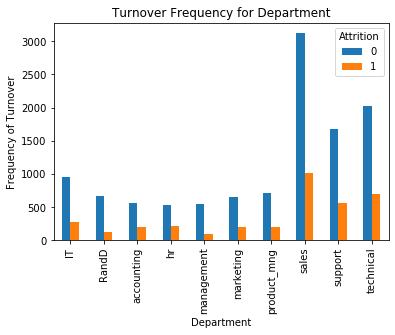

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

pd.crosstab(full_data.dept,full_data.Attrition).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('img/department_bar_chart')

In [10]:
#do visualitions
def bar_plot(full_data):
    pd.crosstab(full_data.dept,full_data.Attrition).plot(kind='bar')
    plt.title('Turn over frequency for Department')
    plt.xlabel('Department')
    plt.ylabel('Frequency of Turnover')
    plt.show()
    plt.savefig('img/department_bar_chart')
    

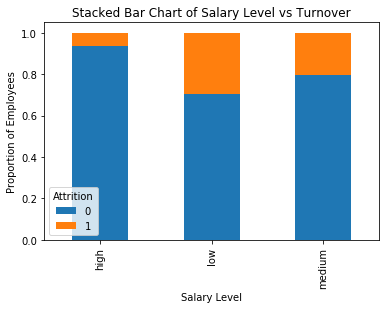

In [11]:
#Bar chart for employee salary level and the frequency of turnover
table=pd.crosstab(full_data.salary, full_data.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('img/salary_bar_chart')
    


In [12]:
#Proportion of employees who left by department
pd.crosstab(full_data.dept,full_data.Attrition)

Attrition,0,1
dept,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


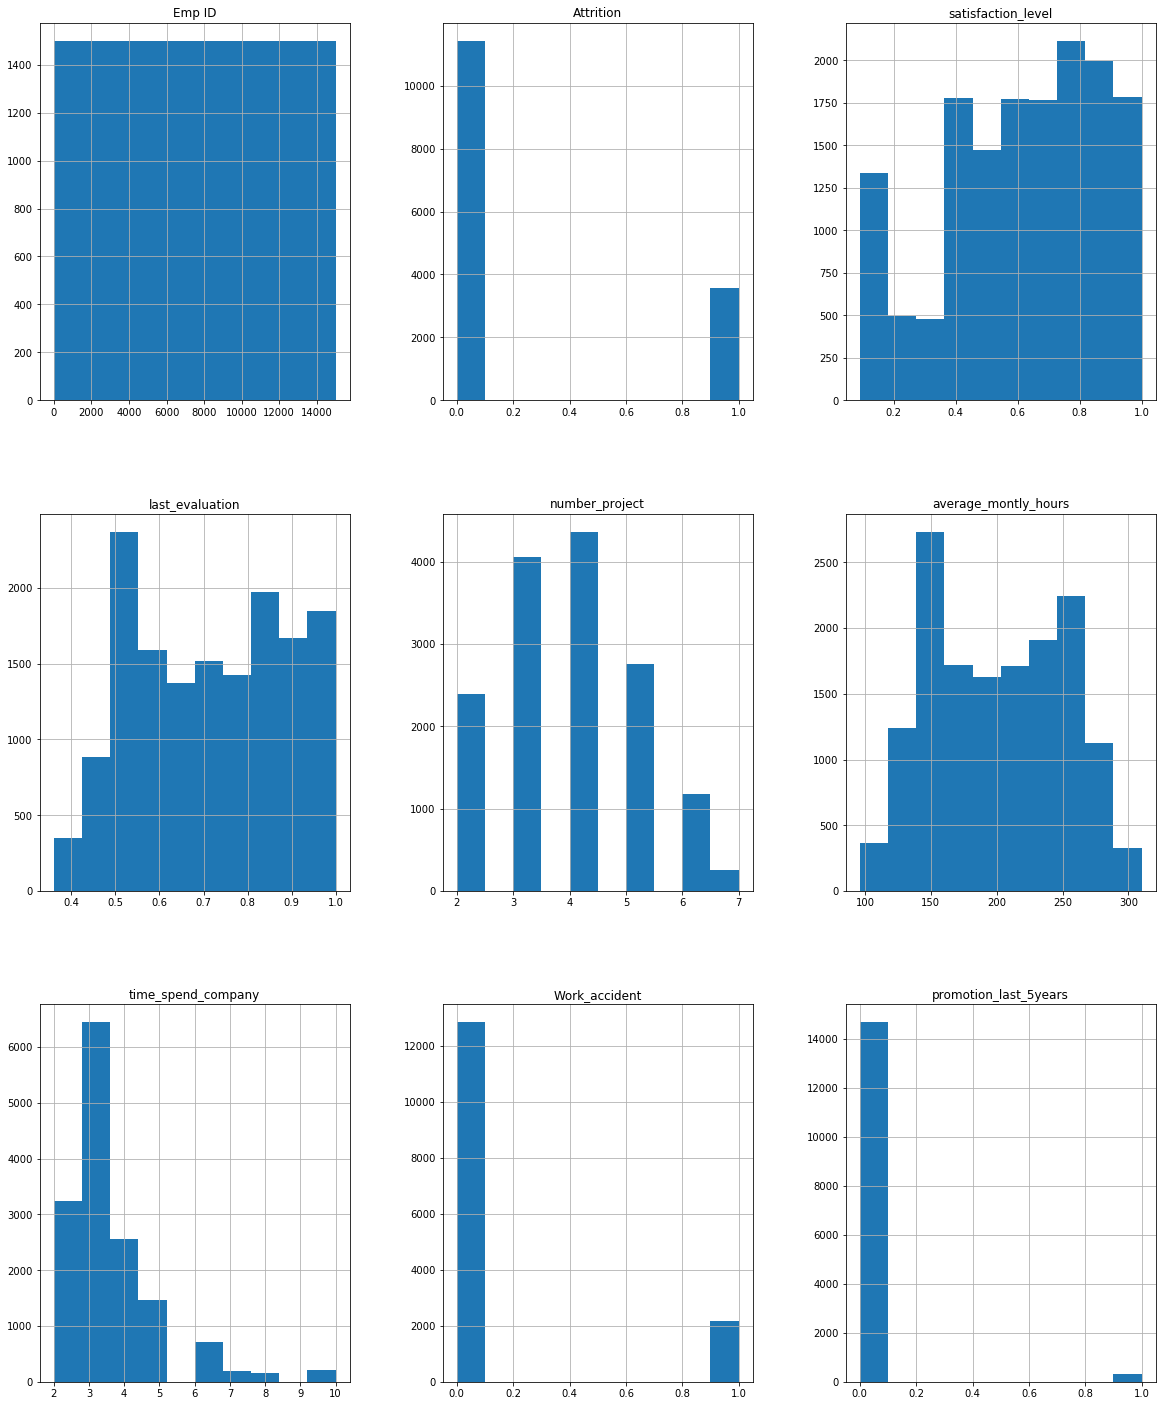

In [13]:
#Histogram of numerical variables
def hist(full_data):
    num_bins = 10 
    full_data.hist(bins=num_bins,figsize=(20,25))
    plt.savefig("img/hr_histogram_plots")
    plt.show()
    
hist(full_data)

In [14]:
#create dummy variables for categorical variables 
categorical_variables = ['dept','salary']
for var in categorical_variables:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(full_data[var],prefix=var)
    full_data1 = full_data.join(cat_list)
    full_data = full_data
    

In [15]:
full_data.drop(full_data.columns[[9,10]],axis=1,inplace=True)

In [16]:
full_data.columns.values

array(['Emp ID', 'Attrition', 'satisfaction_level', 'last_evaluation',
       'number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years'], dtype=object)

# **Task 4**

# Feature Selection


We select the most significant features using RFE. The Recursive Feature Elimination (RFE) works by recursively removing variables and building a model on those variables that remain. It uses the model accuracy to identify which variables (and combination of variables) contribute the most to predicting the target attribute. The Attrition variable has two choices 0 or 1 so we will use logistic regression model to make the predictions, it is our target attribute

In [17]:
full_data_vars = full_data.columns.values.tolist()
y=['Attrition']
X=[i for i in full_data_vars if i not in y]
X

['Emp ID',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#Recursive feature elimination (RFE)
model = LogisticRegression()
rfe = RFE(model,10)
rfe = rfe.fit(full_data[X],full_data[y])
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]


In [19]:

y = full_data['Attrition']


# **Task 5**

# Model Predicting and  Fitting.

In [20]:
#Logistic regression model 
#split the data into training and test samples 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)


ValueError: Found input variables with inconsistent numbers of samples: [8, 14999]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#create a model and train 
model = RandomForestClassifier()
model.fit(X_train,y_train)

In [ ]:
#predict the results for the test
test_pred = model.predict(X_test)

#test the accuracy 
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, model.predict(X_test))))

# **Task 6**

# Model Testing

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('img/random_forest')

In [ ]:
print(classification_report(y_test, svc.predict(X_test)))

In [ ]:
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('img/support_vector_machine')

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, model.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('img/ROC_CURVE')
plt.show()

In [ ]:
import pandas as pd

feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances= feat_importances.nlargest(20)
feat_importances.plot(kind='bar')
plt.savefig('img/feat_importances_bar')
plt.show()

In [ ]:
import numpy as np 
feature_labels = np.array(['satisfaction_level', 'last_evaluation',
       'number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years'])
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))